In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
from datetime import date, timedelta
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.advanced_activations import PReLU
from keras.layers.normalization import BatchNormalization
from keras.layers import LSTM
from keras import callbacks
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import gc

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Load this for combined data + oil + category

In [2]:
df_chunk = pd.read_csv('combined.csv',chunksize=1000000,parse_dates = ['date'],converters={'unit_sales': lambda u: np.log1p(float(u)) if float(u) > 0 else 0})

chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in df_chunk:  
    chunk_list.append(chunk)
    
# concat the list into dataframe 
dataset = pd.concat(chunk_list)

In [3]:
# Lookback time feature
def add_time_diff(df, ori_col, shift_count):
    shift = df[ori_col].shift(shift_count)
    new_col = ori_col + str(shift_count)
    df[new_col] = shift
    return df

## load terence data

In [12]:
dataset = pd.read_csv('data/store_44_train.csv',parse_dates = ['date'])

In [13]:
store_44 = dataset.drop(['cluster',
       'city_state_Ambato_Tungurahua', 'city_state_Babahoyo_Los Rios',
       'city_state_Cayambe_Pichincha', 'city_state_Cuenca_Azuay',
       'city_state_Daule_Guayas', 'city_state_El Carmen_Manabi',
       'city_state_Esmeraldas_Esmeraldas', 'city_state_Guaranda_Bolivar',
       'city_state_Guayaquil_Guayas', 'city_state_Ibarra_Imbabura',
       'city_state_Latacunga_Cotopaxi', 'city_state_Libertad_Guayas',
       'city_state_Loja_Loja', 'city_state_Machala_El Oro',
       'city_state_Manta_Manabi', 'city_state_Playas_Guayas',
       'city_state_Puyo_Pastaza', 'city_state_Quevedo_Los Rios',
       'city_state_Quito_Pichincha', 'city_state_Riobamba_Chimborazo',
       'city_state_Salinas_Santa Elena',
       'city_state_Santo Domingo_Santo Domingo de los Tsachilas',
       'store_type_A', 'store_type_B', 'store_type_C', 'store_type_D',
       'store_type_E'],axis = 1)

In [19]:
store_44 = store_44.fillna(0)
store_44['month'] = store_44['date'].dt.month
store_44['day_of_week'] = store_44['date'].dt.dayofweek
store_44

,date,store_nbr,item_nbr,unit_sales,unit_sales1,unit_sales2,unit_sales3,unit_sales4,unit_sales5,unit_sales6,...,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,dcoilwtico,month
0,2015-01-02,44.0000,103520.0000,2.3979,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,52.7200,1
1,2015-01-02,44.0000,103665.0000,1.9459,10.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,52.7200,1
2,2015-01-02,44.0000,105574.0000,3.3673,6.0000,10.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,52.7200,1
3,2015-01-02,44.0000,105575.0000,3.9703,28.0000,6.0000,10.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,52.7200,1
4,2015-01-02,44.0000,105577.0000,1.9459,52.0000,28.0000,6.0000,10.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,52.7200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415072,2017-08-15,44.0000,2123036.0000,2.8332,7.0000,1.0000,1.0000,1.0000,1.0000,9.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,47.5700,8
2415073,2017-08-15,44.0000,2123727.0000,1.7918,16.0000,7.0000,1.0000,1.0000,1.0000,1.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,47.5700,8
2415074,2017-08-15,44.0000,2123791.0000,0.6931,5.0000,16.0000,7.0000,1.0000,1.0000,1.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,47.5700,8
2415075,2017-08-15,44.0000,2124052.0000,2.5649,1.0000,5.0000,16.0000,7.0000,1.0000,1.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,47.5700,8


## Scaling to one store all products

In [4]:
store_44 = dataset[dataset['store_nbr'] == 44]
store_44 = store_44.sort_values('date')
store_44 = store_44.reset_index()
store_44['month'] = store_44['date'].dt.month
store_44['month'] = store_44['date'].dt.dayofweek
for day in range(1,8):
    store_44 = add_time_diff(store_44, 'unit_sales', day)
store_44 = store_44.fillna(0)
store_44 = store_44.join(pd.get_dummies(store_44['family']))

#store_44 = store_44.drop(['family'],axis = 1)
store_44.head()

,index,id,date,store_nbr,item_nbr,unit_sales,family,class,perishable,dcoilwtico,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
0,59084905,38641037,2015-01-02,44,103520,2.3979,GROCERY I,1028,0,52.7200,...,0,0,0,0,0,0,0,0,0,0
1,59086071,38642203,2015-01-02,44,1047735,2.7726,BEVERAGES,1124,0,52.7200,...,0,0,0,0,0,0,0,0,0,0
2,59086070,38642202,2015-01-02,44,1047734,1.3863,BEVERAGES,1124,0,52.7200,...,0,0,0,0,0,0,0,0,0,0
3,59086069,38642201,2015-01-02,44,1047733,3.3322,BEVERAGES,1124,0,52.7200,...,0,0,0,0,0,0,0,0,0,0
4,59086068,38642200,2015-01-02,44,1047721,3.0445,BEVERAGES,1122,0,52.7200,...,0,0,0,0,0,0,0,0,0,0


In [63]:
store_44

,index,id,date,store_nbr,item_nbr,unit_sales,family,class,perishable,dcoilwtico,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
0,59084905,38641037,2015-01-02,44,103520,2.3979,GROCERY I,1028,0,52.7200,...,0,0,0,0,0,0,0,0,0,0
1,59086071,38642203,2015-01-02,44,1047735,2.7726,BEVERAGES,1124,0,52.7200,...,0,0,0,0,0,0,0,0,0,0
2,59086070,38642202,2015-01-02,44,1047734,1.3863,BEVERAGES,1124,0,52.7200,...,0,0,0,0,0,0,0,0,0,0
3,59086069,38642201,2015-01-02,44,1047733,3.3322,BEVERAGES,1124,0,52.7200,...,0,0,0,0,0,0,0,0,0,0
4,59086068,38642200,2015-01-02,44,1047721,3.0445,BEVERAGES,1122,0,52.7200,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364886,23783305,125472084,2017-08-15,44,902839,2.0794,GROCERY I,1060,0,47.5700,...,0,0,0,0,0,0,0,0,0,0
2364887,23783306,125472085,2017-08-15,44,903283,3.0408,POULTRY,2416,1,47.5700,...,0,0,0,0,0,1,0,0,0,0
2364888,23783307,125472086,2017-08-15,44,903284,2.7138,POULTRY,2416,1,47.5700,...,0,0,0,0,0,1,0,0,0,0
2364889,23783299,125472078,2017-08-15,44,890374,0.6931,GROCERY I,1002,0,47.5700,...,0,0,0,0,0,0,0,0,0,0


### grid

In [5]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import sklearn

In [6]:
y = store_44['unit_sales'].values
df_x = store_44.drop(['item_nbr','index','id','date','store_nbr','class','unit_sales','family'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_x.values, y, test_size=0.3, random_state=1, shuffle = False)
Y_train = np.asarray(y_train)
Y_test = np.asarray(y_test)
print(X_train.shape,Y_train.shape)

(1655423, 46) (1655423,)


In [7]:
def create_model(optimizer = 'adam'):
    model = Sequential()
    model.add(Dense(50, activation = 'relu', input_dim=X_train.shape[1]))
    model.add(Dropout(.2))

    model.add(Dense(50))
    model.add(PReLU())

    model.add(Dense(100))
    model.add(PReLU())

    model.add(Dense(50))
    model.add(PReLU())

    model.add(Dense(25))
    model.add(PReLU())

    model.add(Dense(5))
    model.add(PReLU())

    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=256, verbose=0)

In [ ]:
grid_epoch = [50, 65, 75, 85, 100]
grid_optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
nn_param_grid = dict(epochs = grid_epoch, 
                 optimizer = grid_optimizer)
nn_grid = GridSearchCV(estimator=model, scoring ='neg_mean_squared_error', param_grid=nn_param_grid, n_jobs=1, cv=3, verbose=1)
nn_grid_result = nn_grid.fit(X_train, Y_train)

print("Best: %f using %s" % (nn_grid_result.best_score_, nn_grid_result.best_params_))
nn_means = nn_grid_result.cv_results_['mean_test_score']
nn_stds = nn_grid_result.cv_results_['std_test_score']
nn_params = nn_grid_result.cv_results_['params']
for mean, stdev, param in zip(nn_means, nn_stds, nn_params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 35 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [114]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

### Bigger MLP model

In [97]:
y = store_44['unit_sales'].values
df_x = store_44.drop(['item_nbr','index','id','date','store_nbr','class','unit_sales','family'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_x.values, y, test_size=0.3, random_state=1, shuffle = False)
Y_train = np.asarray(y_train)
Y_test = np.asarray(y_test)
print(X_train.shape,Y_train.shape)
df_x

(1655423, 46) (1655423,)


,perishable,dcoilwtico,day_of_year,day_of_week,week_of_year,onpromotion_cat,month,unit_sales1,unit_sales2,unit_sales3,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
0,0,52.7200,2,4,1,0,4,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
1,0,52.7200,2,4,1,0,4,2.3979,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
2,0,52.7200,2,4,1,0,4,2.7726,2.3979,0.0000,...,0,0,0,0,0,0,0,0,0,0
3,0,52.7200,2,4,1,0,4,1.3863,2.7726,2.3979,...,0,0,0,0,0,0,0,0,0,0
4,0,52.7200,2,4,1,0,4,3.3322,1.3863,2.7726,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364886,0,47.5700,227,1,33,0,1,2.7726,2.6794,2.4849,...,0,0,0,0,0,0,0,0,0,0
2364887,1,47.5700,227,1,33,0,1,2.0794,2.7726,2.6794,...,0,0,0,0,0,1,0,0,0,0
2364888,1,47.5700,227,1,33,0,1,3.0408,2.0794,2.7726,...,0,0,0,0,0,1,0,0,0,0
2364889,0,47.5700,227,1,33,0,1,2.7138,3.0408,2.0794,...,0,0,0,0,0,0,0,0,0,0


In [98]:
model = Sequential()
model.add(Dense(50, activation = 'relu', input_dim=X_train.shape[1]))
model.add(Dropout(.2))

model.add(Dense(50))
model.add(PReLU())

model.add(Dense(100))
model.add(PReLU())

model.add(Dense(50))
model.add(PReLU())

model.add(Dense(25))
model.add(PReLU())

model.add(Dense(5))
model.add(PReLU())

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=55, batch_size=460, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)
model.summary()

Train on 1655423 samples, validate on 709468 samples
Epoch 1/100
1655423/1655423 [==============================] - 17s 10us/step - loss: 1.0575 - val_loss: 1.1901
Epoch 2/100
1655423/1655423 [==============================] - 16s 10us/step - loss: 0.8941 - val_loss: 1.1214
Epoch 3/100
1655423/1655423 [==============================] - 17s 10us/step - loss: 0.8573 - val_loss: 0.9709
Epoch 4/100
1655423/1655423 [==============================] - 17s 10us/step - loss: 0.8292 - val_loss: 0.8879
Epoch 5/100
1655423/1655423 [==============================] - 16s 10us/step - loss: 0.8129 - val_loss: 0.8618
Epoch 6/100
1655423/1655423 [==============================] - 17s 10us/step - loss: 0.8078 - val_loss: 0.8577
Epoch 7/100
1655423/1655423 [==============================] - 16s 10us/step - loss: 0.8066 - val_loss: 0.8507
Epoch 8/100
1655423/1655423 [==============================] - 18s 11us/step - loss: 0.8037 - val_loss: 0.8455
Epoch 9/100
1655423/1655423 [==============================

In [99]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

Train Mean Absolute Error: 0.7113207384496026
Train Root Mean Squared Error: 0.8943525010548481
Test Mean Absolute Error: 0.7175887064308776
Test Root Mean Squared Error: 0.9037317586073962


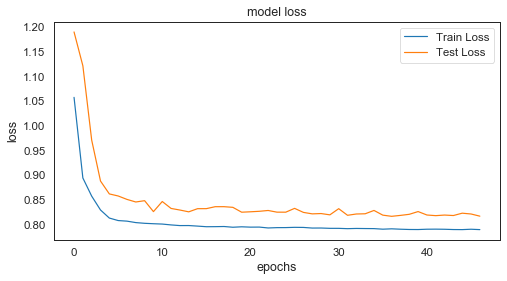

In [100]:
# invert predictions
#train_predict = scaler_y.inverse_transform(train_predict)
#Y_train = scaler_y.inverse_transform([Y_train])
#test_predict = scaler_y.inverse_transform(test_predict)
#Y_test = scaler_y.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train, train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train, train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test, test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test, test_predict[:,0])))

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

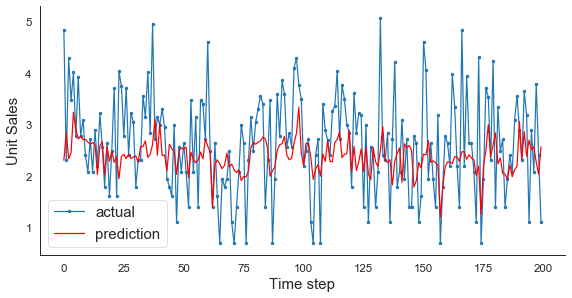

In [101]:
aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Unit Sales', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

## Basic Mlp model

In [ ]:
y = store_44['unit_sales'].values
df_x = store_44.drop(['item_nbr','index','id','date','store_nbr','class','unit_sales','family'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_x.values, y, test_size=0.3, random_state=1, shuffle = False)
Y_train = np.asarray(y_train)
Y_test = np.asarray(y_test)
print(X_train.shape,Y_train.shape)

In [ ]:
model = Sequential()

model.add(Dense(50, activation='relu',input_dim = X_train.shape[1]))
model.add(Dense(100, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=100, batch_size=1000, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss',mode = 'min', patience=10)], verbose=1, shuffle=False)

model.summary()

Train Mean Absolute Error: 0.708042836367238
Train Root Mean Squared Error: 0.8906918645424726
Test Mean Absolute Error: 0.7174825266890125
Test Root Mean Squared Error: 0.9028156702297621


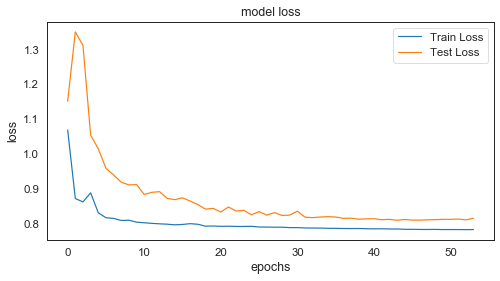

In [95]:
# invert predictions
#train_predict = scaler_y.inverse_transform(train_predict)
#Y_train = scaler_y.inverse_transform([Y_train])
#test_predict = scaler_y.inverse_transform(test_predict)
#Y_test = scaler_y.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train, train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train, train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test, test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test, test_predict[:,0])))

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

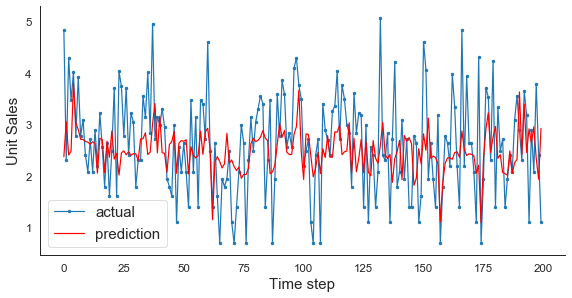

In [96]:
aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Unit Sales', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

## LSTM full

In [83]:
y = store_44['unit_sales'].values
df = store_44.drop(['item_nbr','index','id','date','store_nbr','class','unit_sales','family'],axis = 1)

y = np.reshape(y, (-1, 1))

scaler = MinMaxScaler(feature_range=(0, 1))
df[['unit_sales1', 'unit_sales2', 'unit_sales3', 'unit_sales4', 'unit_sales5', 'unit_sales6', 'unit_sales7']] = scaler.fit_transform(df[['unit_sales1', 'unit_sales2', 'unit_sales3', 'unit_sales4', 'unit_sales5', 'unit_sales6', 'unit_sales7']])

dataset = df.values

scaler_y = MinMaxScaler(feature_range=(0, 1))
y = scaler_y.fit_transform(y)
#y = scaler.fit_transform(y)
X_train, X_test, Y_train, Y_test = train_test_split(dataset, y, test_size=0.3, random_state=1, shuffle = False)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

Y_train_2 = []
for y in Y_train:
    Y_train_2.append(y[0])
Y_train = np.asarray(Y_train_2)

Y_test_2 = []
for y in Y_test:
    Y_test_2.append(y[0])
Y_test = np.asarray(Y_test_2)
print(X_train.shape,Y_train.shape)

(1655423, 1, 46) (1655423,)


In [86]:
X_train[0]

array([[ 0.  , 52.72,  2.  ,  4.  ,  1.  ,  0.  ,  4.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ]])

## without dropout

In [87]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=100, batch_size=1000, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Train on 1655423 samples, validate on 709468 samples
Epoch 1/100
1655423/1655423 [==============================] - 21s 13us/step - loss: 0.0137 - val_loss: 0.0169
Epoch 2/100
1655423/1655423 [==============================] - 23s 14us/step - loss: 0.0135 - val_loss: 0.0236
Epoch 3/100
1655423/1655423 [==============================] - 21s 13us/step - loss: 0.0125 - val_loss: 0.0165
Epoch 4/100
1655423/1655423 [==============================] - 20s 12us/step - loss: 0.0128 - val_loss: 0.0177
Epoch 5/100
1655423/1655423 [==============================] - 19s 11us/step - loss: 0.0110 - val_loss: 0.0166
Epoch 6/100
1655423/1655423 [==============================] - 23s 14us/step - loss: 0.0105 - val_loss: 0.0108
Epoch 7/100
1655423/1655423 [==============================] - 20s 12us/step - loss: 0.0104 - val_loss: 0.0137
Epoch 8/100
1655423/1655423 [==============================] - 21s 13us/step - loss: 0.0104 - val_loss: 0.0120
Epoch 9/100
1655423/1655423 [==============================

In [88]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

Train Mean Absolute Error: 0.7284759962926652
Train Root Mean Squared Error: 0.9172348243580539
Test Mean Absolute Error: 0.736829613129643
Test Root Mean Squared Error: 0.9272236353273786


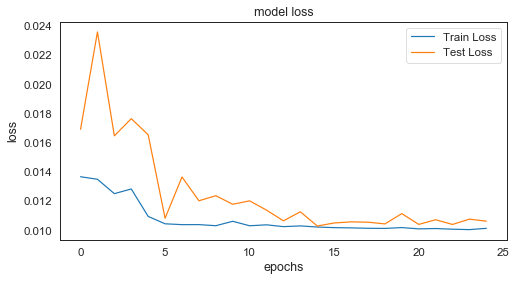

In [89]:
# invert predictions
train_predict = scaler_y.inverse_transform(train_predict)
Y_train = scaler_y.inverse_transform([Y_train])
test_predict = scaler_y.inverse_transform(test_predict)
Y_test = scaler_y.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

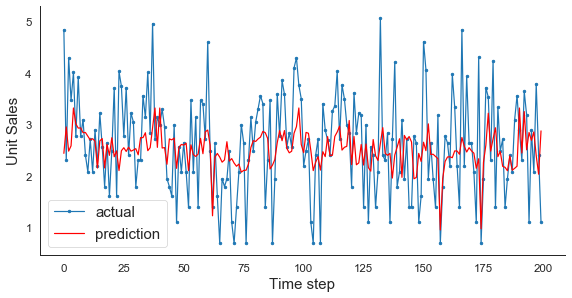

In [90]:
aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Unit Sales', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

## with dropout

In [6]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=100, batch_size=1000, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss',mode = 'min', patience=10)], verbose=1, shuffle=False)

model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 1655423 samples, validate on 709468 samples
Epoch 1/100
1655423/1655423 [==============================] - 13s 8us/step - loss: 0.0192 - val_loss: 0.0144
Epoch 2/100
1655423/1655423 [==============================] - 13s 8us/step - loss: 0.0115 - val_loss: 0.0126
Epoch 3/100
1655423/1655423 [==============================] - 12s 8us/step - loss: 0.0112 - val_loss: 0.0121
Epoch 4/100
1655423/1655423 [==============================] - 12s 8us/step - loss: 0.0107 - val_loss: 0.0116
Epoch 5/100
1655423/1655423 [==============================] - 13s 8us/step - loss: 0.0106 - val_loss: 0.0112
Epoch 6/100
1655423/1655423 [==============================] - 12s 8us/step - loss: 0.0106 - val_loss: 0.0109
Epoch 7/100
1655423/1655423 [==============================] - 12s 7us/s

In [7]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

Train Mean Absolute Error: 0.7282919987636896
Train Root Mean Squared Error: 0.9112683260226605
Test Mean Absolute Error: 0.7369394779941982
Test Root Mean Squared Error: 0.9218881382167023


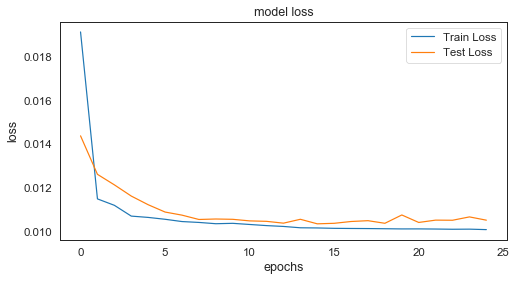

In [8]:
# invert predictions
train_predict = scaler_y.inverse_transform(train_predict)
Y_train = scaler_y.inverse_transform([Y_train])
test_predict = scaler_y.inverse_transform(test_predict)
Y_test = scaler_y.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

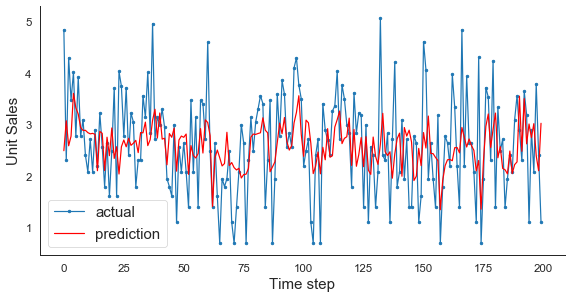

In [9]:
aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Unit Sales', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

## Multi LSTM 

In [75]:
y = store_44['unit_sales'].values
df = store_44.drop(['item_nbr','index','id','date','store_nbr','class','unit_sales','family'],axis = 1)

y = np.reshape(y, (-1, 1))

scaler = MinMaxScaler(feature_range=(0, 1))
df[['unit_sales1', 'unit_sales2', 'unit_sales3', 'unit_sales4', 'unit_sales5', 'unit_sales6', 'unit_sales7']] = scaler.fit_transform(df[['unit_sales1', 'unit_sales2', 'unit_sales3', 'unit_sales4', 'unit_sales5', 'unit_sales6', 'unit_sales7']])

dataset = df.values

scaler_y = MinMaxScaler(feature_range=(0, 1))
y = scaler_y.fit_transform(y)
#y = scaler.fit_transform(y)
X_train, X_test, Y_train, Y_test = train_test_split(dataset, y, test_size=0.3, random_state=1, shuffle = False)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

Y_train_2 = []
for y in Y_train:
    Y_train_2.append(y[0])
Y_train = np.asarray(Y_train_2)

Y_test_2 = []
for y in Y_test:
    Y_test_2.append(y[0])
Y_test = np.asarray(Y_test_2)
print(X_train.shape,Y_train.shape)

(1655423, 1, 46) (1655423,)


In [76]:
model = Sequential()
model.add(LSTM(100, return_sequences = True,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=100, batch_size=1000, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss',mode = 'min', patience=10)], verbose=1, shuffle=False)

model.summary()

Train on 1655423 samples, validate on 709468 samples
Epoch 1/100
1655423/1655423 [==============================] - 43s 26us/step - loss: 0.0122 - val_loss: 0.0132
Epoch 2/100
1655423/1655423 [==============================] - 34s 20us/step - loss: 0.0108 - val_loss: 0.0113
Epoch 3/100
1655423/1655423 [==============================] - 33s 20us/step - loss: 0.0105 - val_loss: 0.0111
Epoch 4/100
1655423/1655423 [==============================] - 36s 22us/step - loss: 0.0104 - val_loss: 0.0125
Epoch 5/100
1655423/1655423 [==============================] - 32s 19us/step - loss: 0.0102 - val_loss: 0.0121
Epoch 6/100
1655423/1655423 [==============================] - 32s 20us/step - loss: 0.0102 - val_loss: 0.0112
Epoch 7/100
1655423/1655423 [==============================] - 34s 20us/step - loss: 0.0101 - val_loss: 0.0127
Epoch 8/100
1655423/1655423 [==============================] - 32s 20us/step - loss: 0.0101 - val_loss: 0.0110
Epoch 9/100
1655423/1655423 [==============================

In [77]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

Train Mean Absolute Error: 0.7265159034826708
Train Root Mean Squared Error: 0.9113052088337489
Test Mean Absolute Error: 0.7351450402685835
Test Root Mean Squared Error: 0.9237413280720222


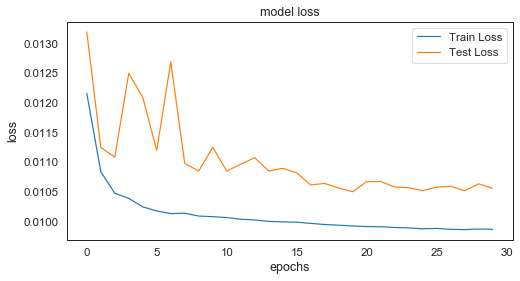

In [78]:
# invert predictions
train_predict = scaler_y.inverse_transform(train_predict)
Y_train = scaler_y.inverse_transform([Y_train])
test_predict = scaler_y.inverse_transform(test_predict)
Y_test = scaler_y.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

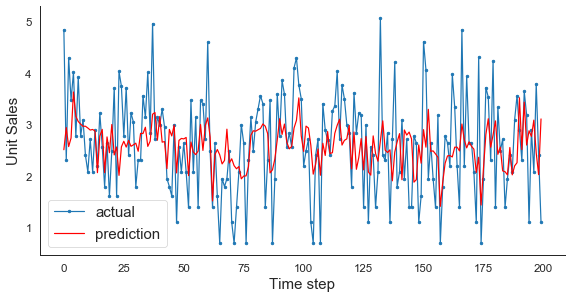

In [79]:
aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Unit Sales', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [109]:
y = store_44['unit_sales'].values
df = store_44.drop(['item_nbr','index','id','date','store_nbr','class','unit_sales','family'],axis = 1)

y = np.reshape(y, (-1, 1))

scaler = MinMaxScaler(feature_range=(0, 1))
df[['unit_sales1', 'unit_sales2', 'unit_sales3', 'unit_sales4', 'unit_sales5', 'unit_sales6', 'unit_sales7']] = scaler.fit_transform(df[['unit_sales1', 'unit_sales2', 'unit_sales3', 'unit_sales4', 'unit_sales5', 'unit_sales6', 'unit_sales7']])

dataset = df.values

scaler_y = MinMaxScaler(feature_range=(0, 1))
y = scaler_y.fit_transform(y)
#y = scaler.fit_transform(y)
X_train, X_test, Y_train, Y_test = train_test_split(dataset, y, test_size=0.3, random_state=1, shuffle = False)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

Y_train_2 = []
for y in Y_train:
    Y_train_2.append(y[0])
Y_train = np.asarray(Y_train_2)

Y_test_2 = []
for y in Y_test:
    Y_test_2.append(y[0])
Y_test = np.asarray(Y_test_2)
print(X_train.shape,Y_train.shape)

(1655423, 1, 46) (1655423,)


In [111]:
model = Sequential()

model.add(SimpleRNN(100, activation='relu',input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=100, batch_size=1000, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss',mode = 'min', patience=10)], verbose=1, shuffle=False)

model.summary()

Train on 1655423 samples, validate on 709468 samples
Epoch 1/100
1655423/1655423 [==============================] - 14s 8us/step - loss: 0.0907 - val_loss: 0.1178
Epoch 2/100
1655423/1655423 [==============================] - 13s 8us/step - loss: 0.0356 - val_loss: 0.4415
Epoch 3/100
1655423/1655423 [==============================] - 13s 8us/step - loss: 0.0174 - val_loss: 0.0811
Epoch 4/100
1655423/1655423 [==============================] - 13s 8us/step - loss: 0.0121 - val_loss: 0.0221
Epoch 5/100
1655423/1655423 [==============================] - 12s 7us/step - loss: 0.0112 - val_loss: 0.0125
Epoch 6/100
1655423/1655423 [==============================] - 13s 8us/step - loss: 0.0129 - val_loss: 0.0154
Epoch 7/100
1655423/1655423 [==============================] - 12s 8us/step - loss: 0.0111 - val_loss: 0.0113
Epoch 8/100
1655423/1655423 [==============================] - 13s 8us/step - loss: 0.0112 - val_loss: 0.0117
Epoch 9/100
1655423/1655423 [==============================] - 13s 

In [112]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

Train Mean Absolute Error: 0.7164513036883279
Train Root Mean Squared Error: 0.9017998303801252
Test Mean Absolute Error: 0.7228177455422644
Test Root Mean Squared Error: 0.9096234983912217


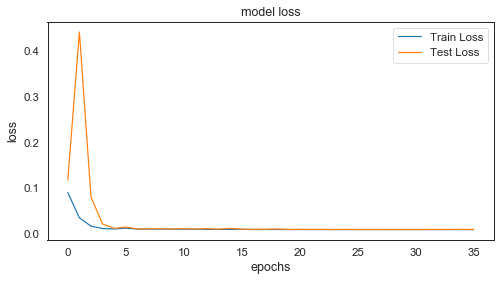

In [113]:
# invert predictions
train_predict = scaler_y.inverse_transform(train_predict)
Y_train = scaler_y.inverse_transform([Y_train])
test_predict = scaler_y.inverse_transform(test_predict)
Y_test = scaler_y.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

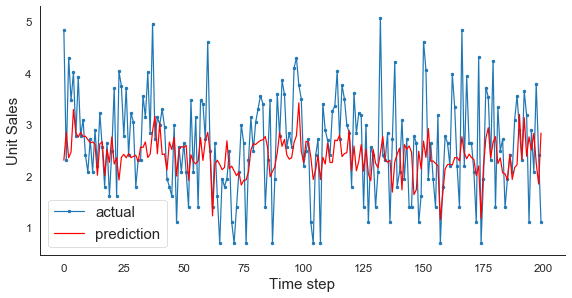

In [114]:
aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Unit Sales', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

## Ensemble with prelu

In [101]:
y = store_44['unit_sales'].values
df = store_44.drop(['item_nbr','index','id','date','store_nbr','class','unit_sales','family'],axis = 1)

y = np.reshape(y, (-1, 1))

scaler = MinMaxScaler(feature_range=(0, 1))
df[['unit_sales1', 'unit_sales2', 'unit_sales3', 'unit_sales4', 'unit_sales5', 'unit_sales6', 'unit_sales7']] = scaler.fit_transform(df[['unit_sales1', 'unit_sales2', 'unit_sales3', 'unit_sales4', 'unit_sales5', 'unit_sales6', 'unit_sales7']])

dataset = df.values

scaler_y = MinMaxScaler(feature_range=(0, 1))
y = scaler_y.fit_transform(y)
#y = scaler.fit_transform(y)
X_train, X_test, Y_train, Y_test = train_test_split(dataset, y, test_size=0.3, random_state=1, shuffle = False)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

Y_train_2 = []
for y in Y_train:
    Y_train_2.append(y[0])
Y_train = np.asarray(Y_train_2)

Y_test_2 = []
for y in Y_test:
    Y_test_2.append(y[0])
Y_test = np.asarray(Y_test_2)
print(X_train.shape,Y_train.shape)

(1655423, 1, 46) (1655423,)


In [102]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(.2))

model.add(Dense(25))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(.05))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=100, batch_size=1000, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)


Train on 1655423 samples, validate on 709468 samples
Epoch 1/100
1655423/1655423 [==============================] - 28s 17us/step - loss: 0.0881 - val_loss: 5.8458
Epoch 2/100
1655423/1655423 [==============================] - 25s 15us/step - loss: 0.0129 - val_loss: 0.3008
Epoch 3/100
1655423/1655423 [==============================] - 25s 15us/step - loss: 0.0106 - val_loss: 0.1292
Epoch 4/100
1655423/1655423 [==============================] - 25s 15us/step - loss: 0.0104 - val_loss: 0.2915
Epoch 5/100
1655423/1655423 [==============================] - 25s 15us/step - loss: 0.0104 - val_loss: 0.1898
Epoch 6/100
1655423/1655423 [==============================] - 25s 15us/step - loss: 0.0103 - val_loss: 0.1962
Epoch 7/100
1655423/1655423 [==============================] - 25s 15us/step - loss: 0.0103 - val_loss: 0.0855
Epoch 8/100
1655423/1655423 [==============================] - 25s 15us/step - loss: 0.0102 - val_loss: 0.1372
Epoch 9/100
1655423/1655423 [==============================

In [40]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(.2))

model.add(Dense(50))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(.1))

model.add(Dense(25))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(.05))

model.add(Dense(5))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(.05))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=100, batch_size=1000, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)


Train on 1655423 samples, validate on 709468 samples
Epoch 1/100
1655423/1655423 [==============================] - 36s 22us/step - loss: 0.0797 - val_loss: 0.3740
Epoch 2/100
1655423/1655423 [==============================] - 34s 20us/step - loss: 0.0151 - val_loss: 0.1122
Epoch 3/100
1655423/1655423 [==============================] - 35s 21us/step - loss: 0.0110 - val_loss: 0.0551
Epoch 4/100
1655423/1655423 [==============================] - 34s 20us/step - loss: 0.0105 - val_loss: 0.4644
Epoch 5/100
1655423/1655423 [==============================] - 34s 21us/step - loss: 0.0103 - val_loss: 0.0673
Epoch 6/100
1655423/1655423 [==============================] - 35s 21us/step - loss: 0.0103 - val_loss: 0.3583
Epoch 7/100
1655423/1655423 [==============================] - 35s 21us/step - loss: 0.0102 - val_loss: 0.0630
Epoch 8/100
1655423/1655423 [==============================] - 38s 23us/step - loss: 0.0102 - val_loss: 0.5596
Epoch 9/100
1655423/1655423 [==============================

In [103]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

Train Mean Absolute Error: 2.928823421488387
Train Root Mean Squared Error: 4.927007927827912
Test Mean Absolute Error: 4.312175678103941
Test Root Mean Squared Error: 6.2856401167355616


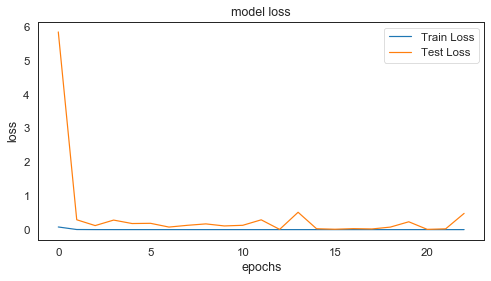

In [104]:
# invert predictions
train_predict = scaler_y.inverse_transform(train_predict)
Y_train = scaler_y.inverse_transform([Y_train])
test_predict = scaler_y.inverse_transform(test_predict)
Y_test = scaler_y.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

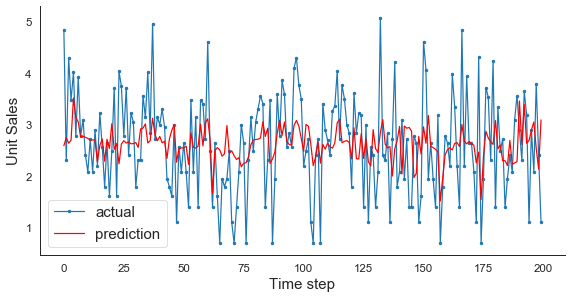

In [105]:
aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Unit Sales', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [115]:
# univariate cnn lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))


In [117]:
y

array([50, 60, 70, 80, 90])

In [27]:
y = store_44['unit_sales'].values
df = store_44.drop(['item_nbr','index','id','date','store_nbr','class','unit_sales','family'],axis = 1)

y = np.reshape(y, (-1, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
y = scaler_y.fit_transform(y)

scaler = MinMaxScaler(feature_range=(0, 1))
df[['unit_sales1', 'unit_sales2', 'unit_sales3', 'unit_sales4', 'unit_sales5', 'unit_sales6', 'unit_sales7']] = scaler.fit_transform(df[['unit_sales1', 'unit_sales2', 'unit_sales3', 'unit_sales4', 'unit_sales5', 'unit_sales6', 'unit_sales7']])

dataset = df.values

In [28]:
print(dataset.shape,y.shape)

(2364891, 46) (2364891, 1)


In [29]:
def split_sequence(sequence, n_steps):
	X = list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x = sequence[i:end_ix]
		X.append(seq_x)
	return np.asarray(X)

n_steps = 7
X = split_sequence(dataset,n_steps)
y = y[n_steps:]

split_at = round(X.shape[0] * 0.7)
X_train = X[:split_at]
X_test = X[split_at:]
Y_train = y[:split_at]
Y_test = y[split_at:]

Y_train_2 = []
for y in Y_train:
    Y_train_2.append(y[0])
Y_train = np.asarray(Y_train_2)

Y_test_2 = []
for y in Y_test:
    Y_test_2.append(y[0])
Y_test = np.asarray(Y_test_2)

print(X_train.shape,Y_train.shape)

print(X_test.shape,Y_test.shape)


(1655419, 7, 46) (1655419,)
(709465, 7, 46) (709465,)


In [32]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=100, batch_size=1000, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss',mode = 'min', patience=10)], verbose=1, shuffle=False)

model.summary()

Train on 1655419 samples, validate on 709465 samples
Epoch 1/100
1655419/1655419 [==============================] - 64s 39us/step - loss: 0.0209 - val_loss: 0.0160
Epoch 2/100
1655419/1655419 [==============================] - 61s 37us/step - loss: 0.0133 - val_loss: 0.0176
Epoch 3/100
1655419/1655419 [==============================] - 61s 37us/step - loss: 0.0125 - val_loss: 0.0156
Epoch 4/100
1655419/1655419 [==============================] - 62s 37us/step - loss: 0.0122 - val_loss: 0.0140
Epoch 5/100
1655419/1655419 [==============================] - 62s 37us/step - loss: 0.0120 - val_loss: 0.0142
Epoch 6/100
1655419/1655419 [==============================] - 70s 42us/step - loss: 0.0120 - val_loss: 0.0131
Epoch 7/100
1655419/1655419 [==============================] - 70s 42us/step - loss: 0.0119 - val_loss: 0.0133
Epoch 8/100
1655419/1655419 [==============================] - 66s 40us/step - loss: 0.0119 - val_loss: 0.0128
Epoch 9/100
1655419/1655419 [==============================

In [33]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

Train Mean Absolute Error: 0.7759275549829959
Train Root Mean Squared Error: 0.9689934018542049
Test Mean Absolute Error: 0.7879252082064067
Test Root Mean Squared Error: 0.9851252954985821


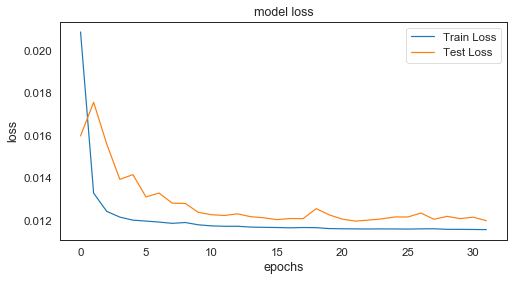

In [34]:
# invert predictions
train_predict = scaler_y.inverse_transform(train_predict)
Y_train = scaler_y.inverse_transform([Y_train])
test_predict = scaler_y.inverse_transform(test_predict)
Y_test = scaler_y.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

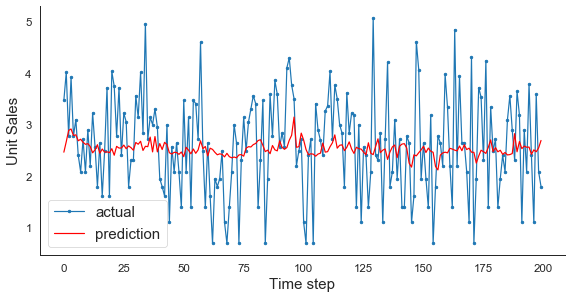

In [35]:
aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Unit Sales', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [42]:
store_44.columns.values

array(['index', 'id', 'date', 'store_nbr', 'item_nbr', 'unit_sales',
       'family', 'class', 'perishable', 'dcoilwtico', 'day_of_year',
       'day_of_week', 'week_of_year', 'onpromotion_cat', 'month',
       'unit_sales1', 'unit_sales2', 'unit_sales3', 'unit_sales4',
       'unit_sales5', 'unit_sales6', 'unit_sales7', 'AUTOMOTIVE',
       'BEAUTY', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY', 'CELEBRATION',
       'CLEANING', 'DAIRY', 'DELI', 'EGGS', 'FROZEN FOODS', 'GROCERY I',
       'GROCERY II', 'HARDWARE', 'HOME AND KITCHEN I',
       'HOME AND KITCHEN II', 'HOME APPLIANCES', 'HOME CARE',
       'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE', 'LIQUOR,WINE,BEER',
       'MAGAZINES', 'MEATS', 'PERSONAL CARE', 'PET SUPPLIES',
       'PLAYERS AND ELECTRONICS', 'POULTRY', 'PREPARED FOODS', 'PRODUCE',
       'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD'], dtype=object)

In [82]:
y = store_44['unit_sales'].values
df = store_44.drop(['item_nbr','index','id','date','store_nbr','class','unit_sales1', 'unit_sales2', 'unit_sales3', 'unit_sales4', 'unit_sales5', 'unit_sales6', 'unit_sales7', 'family'],axis = 1)

y = np.reshape(y, (-1, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))
y = scaler_y.fit_transform(y)

scaler = MinMaxScaler(feature_range=(0, 1))
#df[['unit_sales1', 'unit_sales2', 'unit_sales3', 'unit_sales4', 'unit_sales5', 'unit_sales6', 'unit_sales7']] = scaler.fit_transform(df[['unit_sales1', 'unit_sales2', 'unit_sales3', 'unit_sales4', 'unit_sales5', 'unit_sales6', 'unit_sales7']])
df[['unit_sales']] = scaler.fit_transform(df[['unit_sales']])
dataset = df.values

print(dataset[0])
df

[ 0.26677529  0.         52.72        2.          4.          1.
  0.          4.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]


,unit_sales,perishable,dcoilwtico,day_of_year,day_of_week,week_of_year,onpromotion_cat,month,AUTOMOTIVE,BEAUTY,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
0,0.2668,0,52.7200,2,4,1,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.3085,0,52.7200,2,4,1,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.1542,0,52.7200,2,4,1,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.3707,0,52.7200,2,4,1,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.3387,0,52.7200,2,4,1,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364886,0.2313,0,47.5700,227,1,33,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2364887,0.3383,1,47.5700,227,1,33,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2364888,0.3019,1,47.5700,227,1,33,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2364889,0.0771,0,47.5700,227,1,33,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
def split_sequence(sequence, n_steps):
	X = list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x = sequence[i:end_ix]
		X.append(seq_x)
	return np.asarray(X)

n_steps = 7
X = split_sequence(dataset,n_steps)
y = y[n_steps:]

split_at = round(X.shape[0] * 0.7)
X_train = X[:split_at]
X_test = X[split_at:]
Y_train = y[:split_at]
Y_test = y[split_at:]

Y_train_2 = []
for y in Y_train:
    Y_train_2.append(y[0])
Y_train = np.asarray(Y_train_2)

Y_test_2 = []
for y in Y_test:
    Y_test_2.append(y[0])
Y_test = np.asarray(Y_test_2)

print(X_train.shape,Y_train.shape)

print(X_test.shape,Y_test.shape)


(1655419, 7, 40) (1655419,)
(709465, 7, 40) (709465,)


In [84]:
input_shape_train = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],input_shape_train)
input_shape_test = X_test.shape[1] * X_test.shape[2]
X_test = X_test.reshape(X_test.shape[0],input_shape_test)
print(X_train.shape,X_test.shape)

(1655419, 280) (709465, 280)


In [85]:
model = Sequential()
model.add(Dense(150, activation = 'relu', input_dim=(input_shape_train)))
model.add(Dropout(.2))

model.add(Dense(100))
model.add(PReLU())

model.add(Dense(50))
model.add(PReLU())

model.add(Dense(25))
model.add(PReLU())

model.add(Dense(5))
model.add(PReLU())

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=100, batch_size=1000, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)


Train on 1655419 samples, validate on 709465 samples
Epoch 1/100
1655419/1655419 [==============================] - 22s 14us/step - loss: 0.0898 - val_loss: 0.0247
Epoch 2/100
1655419/1655419 [==============================] - 19s 12us/step - loss: 0.0133 - val_loss: 0.0139
Epoch 3/100
1655419/1655419 [==============================] - 19s 12us/step - loss: 0.0125 - val_loss: 0.0129
Epoch 4/100
1655419/1655419 [==============================] - 20s 12us/step - loss: 0.0122 - val_loss: 0.0129
Epoch 5/100
1655419/1655419 [==============================] - 20s 12us/step - loss: 0.0121 - val_loss: 0.0144
Epoch 6/100
1655419/1655419 [==============================] - 20s 12us/step - loss: 0.0121 - val_loss: 0.0148
Epoch 7/100
1655419/1655419 [==============================] - 19s 12us/step - loss: 0.0121 - val_loss: 0.0142
Epoch 8/100
1655419/1655419 [==============================] - 20s 12us/step - loss: 0.0120 - val_loss: 0.0127
Epoch 9/100
1655419/1655419 [==============================

In [54]:
model = Sequential()

model.add(Dense(50, activation='relu',input_dim = input_shape_train))
model.add(Dense(100, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=100, batch_size=1000, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss',mode = 'min', patience=10)], verbose=1, shuffle=False)

model.summary()

Train on 1655419 samples, validate on 709465 samples
Epoch 1/100
1655419/1655419 [==============================] - 13s 8us/step - loss: 0.2017 - val_loss: 0.0627
Epoch 2/100
1655419/1655419 [==============================] - 11s 7us/step - loss: 0.0175 - val_loss: 0.0228
Epoch 3/100
1655419/1655419 [==============================] - 12s 7us/step - loss: 0.0216 - val_loss: 0.0429
Epoch 4/100
1655419/1655419 [==============================] - 14s 8us/step - loss: 0.0157 - val_loss: 0.0195
Epoch 5/100
1655419/1655419 [==============================] - 13s 8us/step - loss: 0.0143 - val_loss: 0.0173
Epoch 6/100
1655419/1655419 [==============================] - 11s 7us/step - loss: 0.0131 - val_loss: 0.0176
Epoch 7/100
1655419/1655419 [==============================] - 11s 7us/step - loss: 0.0127 - val_loss: 0.0165
Epoch 8/100
1655419/1655419 [==============================] - 12s 7us/step - loss: 0.0130 - val_loss: 0.0132
Epoch 9/100
1655419/1655419 [==============================] - 11s 

In [86]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

Train Mean Absolute Error: 0.7759572603382158
Train Root Mean Squared Error: 0.9674613909903432
Test Mean Absolute Error: 0.7860830530125572
Test Root Mean Squared Error: 0.9827574970355972


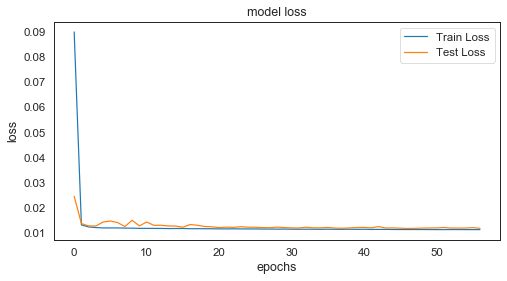

In [87]:
# invert predictions
train_predict = scaler_y.inverse_transform(train_predict)
Y_train = scaler_y.inverse_transform([Y_train])
test_predict = scaler_y.inverse_transform(test_predict)
Y_test = scaler_y.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

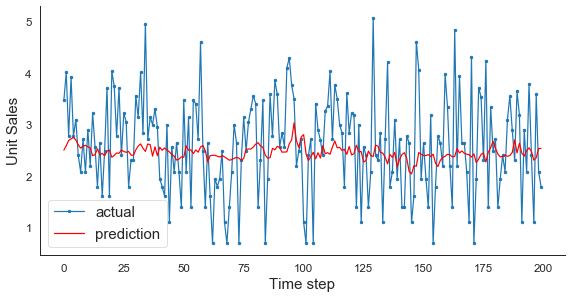

In [88]:
aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Unit Sales', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();